In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

users_path = '/content/drive/MyDrive/datasets/movies/users.csv'
items_path = '/content/drive/MyDrive/datasets/movies/items.csv'
interactions_path = '/content/drive/MyDrive/datasets/movies/interactions.csv'

In [2]:
users_df = pd.read_csv(users_path)
items_df = pd.read_csv(items_path)
interactions_df = pd.read_csv(interactions_path)

# Users

In [3]:
users_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840197 entries, 0 to 840196
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   840197 non-null  int64 
 1   age       826102 non-null  object
 2   income    825421 non-null  object
 3   sex       826366 non-null  object
 4   kids_flg  840197 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 32.1+ MB


In [4]:
users_df.head()

,user_id,age,income,sex,kids_flg
0,973171,age_25_34,income_60_90,М,1
1,962099,age_18_24,income_20_40,М,0
2,1047345,age_45_54,income_40_60,Ж,0
3,721985,age_45_54,income_20_40,Ж,0
4,704055,age_35_44,income_60_90,Ж,0


In [5]:
users_df.user_id.duplicated().sum()

0

<Axes: >

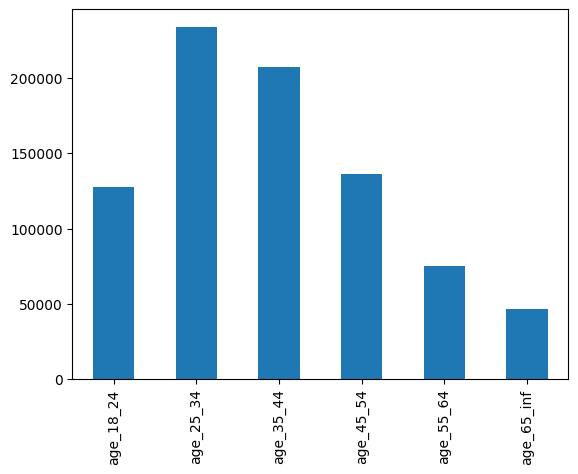

In [6]:
users_df.age.value_counts().sort_index().plot(kind='bar')

<Axes: >

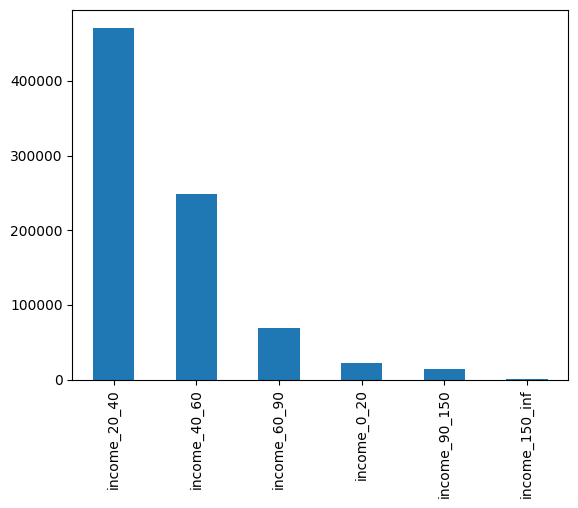

In [7]:
users_df.income.value_counts().plot(kind='bar')

<Axes: title={'center': 'Количество пользователей разного пола'}>

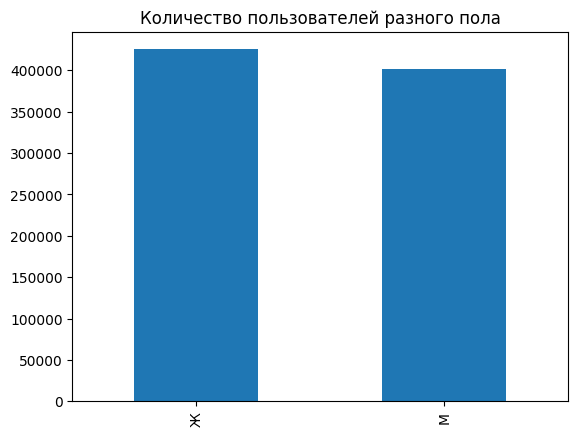

In [8]:
users_df.sex.value_counts().plot(kind='bar', title='Количество пользователей разного пола')

<Axes: title={'center': 'Количество пользователй по наличию детей'}>

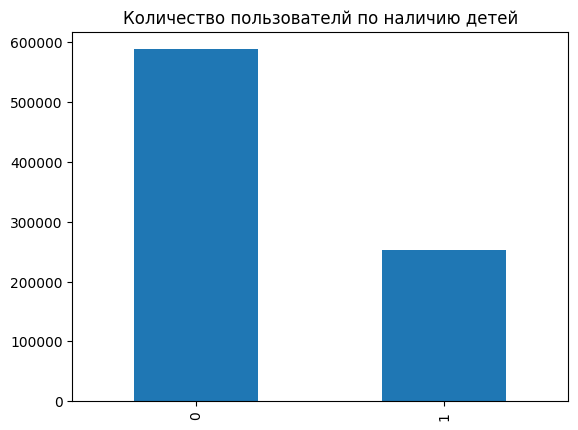

In [9]:
users_df.kids_flg.value_counts().plot(kind='bar', title='Количество пользователй по наличию детей')

<Axes: >

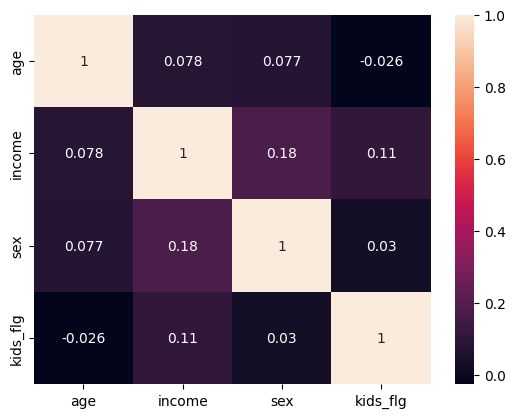

In [10]:
users_heatmap = users_df.copy(deep=True)
users_heatmap.dropna(inplace=True)
users_heatmap = users_heatmap.loc[:, ['age', 'income', 'sex', 'kids_flg']]
users_heatmap.replace(
    {'age_18_24': 1, 'age_25_34': 2, 'age_35_44': 3, 'age_45_54': 4, 'age_55_64':5, 'age_65_inf':6,
     'income_0_20': 1, 'income_20_40': 2, 'income_40_60': 3, 'income_60_90': 4, 'income_90_150':5, 'income_150_inf':6,
     'Ж': 0, 'М': 1}, inplace=True
)

sns.heatmap(users_heatmap.corr(), annot=True, )


# Items

In [11]:
items_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15963 entries, 0 to 15962
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       15963 non-null  int64  
 1   content_type  15963 non-null  object 
 2   title         15963 non-null  object 
 3   title_orig    11218 non-null  object 
 4   release_year  15865 non-null  float64
 5   genres        15963 non-null  object 
 6   countries     15926 non-null  object 
 7   for_kids      566 non-null    float64
 8   age_rating    15961 non-null  float64
 9   studios       1065 non-null   object 
 10  directors     14454 non-null  object 
 11  actors        13344 non-null  object 
 12  description   15961 non-null  object 
 13  keywords      15540 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.7+ MB


In [12]:
items_df.head(3)

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
0,10711,film,Поговори с ней,Hable con ella,2002.0,"драмы, зарубежные, детективы, мелодрамы",Испания,NaN,16.0,NaN,Педро Альмодовар,"Адольфо Фернандес, Ана Фернандес, Дарио Гранди...",Мелодрама легендарного Педро Альмодовара «Пого...,"Поговори, ней, 2002, Испания, друзья, любовь, ..."
1,2508,film,Голые перцы,Search Party,2014.0,"зарубежные, приключения, комедии",США,NaN,16.0,NaN,Скот Армстронг,"Адам Палли, Брайан Хаски, Дж.Б. Смув, Джейсон ...",Уморительная современная комедия на популярную...,"Голые, перцы, 2014, США, друзья, свадьбы, прео..."
2,10716,film,Тактическая сила,Tactical Force,2011.0,"криминал, зарубежные, триллеры, боевики, комедии",Канада,NaN,16.0,NaN,Адам П. Калтраро,"Адриан Холмс, Даррен Шалави, Джерри Вассерман,...",Профессиональный рестлер Стив Остин («Все или ...,"Тактическая, сила, 2011, Канада, бандиты, ганг..."


In [13]:
items_df.loc[:, [ 'title', 'title_orig', 'release_year', 'directors']].duplicated().sum()

20

In [14]:
items_df[items_df.loc[:, ['title', 'title_orig', 'release_year', 'directors']].duplicated()].head()

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
3635,2143,series,Чебурашка. Секрет праздника,NaN,2020.0,"семейное, мультфильмы, приключения, комедии",Россия,1.0,0.0,NaN,Дарина Шмидт,"Анжелика Варум, Леонид Ярмольник, Диомид Виног...",Празднование Нового Года для Чебурашки и Гены ...,"Чебурашка, Секрет, праздника, 2020, Россия"
4029,7725,film,Концерт группы Помпея/Pompeya,Kontsert gruppy Pompeya/Pompeya,2020.0,"концерт, музыкальные",Россия,NaN,12.0,NaN,Глова Роман Юрьевич,"Даниил Брод, Денис Агафонов, Дмитрий Винников",МТС «Карантинники» — это домашние акустические...,"2020, россия, концерт, группы, помпея, pompeya"
4222,14168,series,Концерт SIROTKIN,Kontsert SIROTKIN,2020.0,музыкальные,Россия,NaN,12.0,NaN,Глова Роман Юрьевич,NaN,МТС «Карантинники» — это домашние акустические...,NaN
4728,8982,series,Концерт Мумий Тролль,Kontsert Mumiy Troll',2020.0,музыкальные,Россия,NaN,12.0,NaN,Глова Роман Юрьевич,"Илья Лагутенко, Олег Пунгин, Александр Холенко...",МТС «Карантинники» — это домашние акустические...,NaN
5552,12722,film,Концерт ЛИЗЕР / LIZER,Kontsert LIZER / LIZER,2020.0,"концерт, музыкальные",Россия,NaN,12.0,NaN,Глова Роман Юрьевич,NaN,МТС «Карантинники» — это домашние акустические...,"2020, россия, концерт, лизер, lizer"


<Axes: title={'center': 'Количество фильмов и сериалов'}>

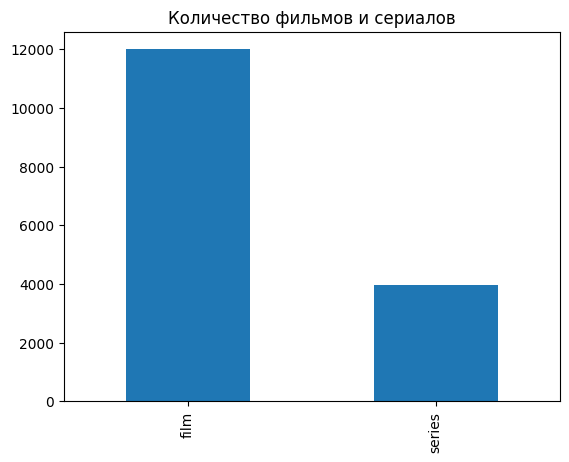

In [15]:
items_df.content_type.value_counts().plot(kind='bar', title='Количество фильмов и сериалов')

In [16]:
items_df.countries.value_counts()[:10]

Россия              4237
США                 4090
СССР                1401
Франция             1158
Великобритания       718
Украина              340
Италия               256
Канада               233
Республика Корея     230
Испания              192
Name: countries, dtype: int64

<Axes: >

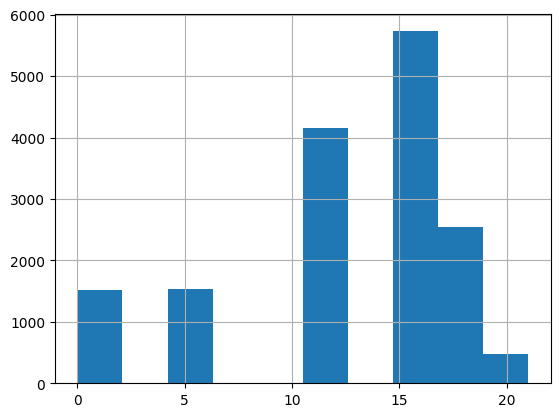

In [17]:
items_df.age_rating.hist()

In [18]:
items_df.directors.value_counts()[:10]

Оливье Шиабоду         511
Денис Франческо         49
Глова Роман Юрьевич     36
Сергей Зарев            29
Альфред Хичкок          28
Бад Фокс                27
Бернар Геррини          26
Стивен Спилберг         25
Андрей Селиванов        22
Эльдар Рязанов          19
Name: directors, dtype: int64

#Interactions

In [19]:
interactions_df.last_watch_dt = pd.to_datetime(interactions_df.last_watch_dt)

In [20]:
interactions_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5476251 entries, 0 to 5476250
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   user_id        5476251 non-null  int64         
 1   item_id        5476251 non-null  int64         
 2   last_watch_dt  5476251 non-null  datetime64[ns]
 3   total_dur      5476251 non-null  int64         
 4   watched_pct    5475423 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 208.9 MB


In [21]:
interactions_df.head()

,user_id,item_id,last_watch_dt,total_dur,watched_pct
0,176549,9506,2021-05-11,4250,72.0
1,699317,1659,2021-05-29,8317,100.0
2,656683,7107,2021-05-09,10,0.0
3,864613,7638,2021-07-05,14483,100.0
4,964868,9506,2021-04-30,6725,100.0


In [22]:
print(f'Number of unique users with interactions: {interactions_df.user_id.nunique()}')
print(f'Number of unique movies/series with interactions: {interactions_df.item_id.nunique()}')

Number of unique users with interactions: 962179
Number of unique movies/series with interactions: 15706


In [23]:
print(f'Interactions time range: {interactions_df.last_watch_dt.min()} to {interactions_df.last_watch_dt.max()}')

Interactions time range: 2021-03-13 00:00:00 to 2021-08-22 00:00:00


<Axes: >

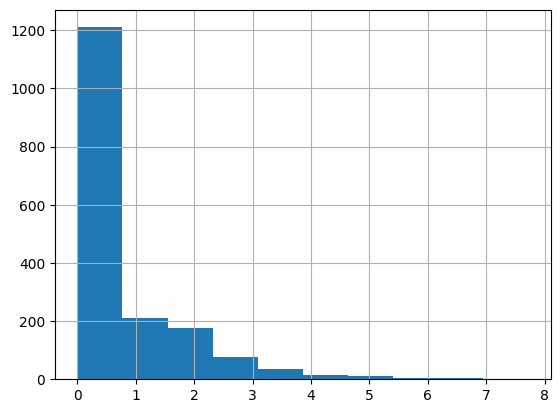

In [24]:
np.log(interactions_df.groupby('item_id').agg('count').user_id.value_counts()).hist() # Распределение количества взаимодейсвий у фильмов

<Axes: >

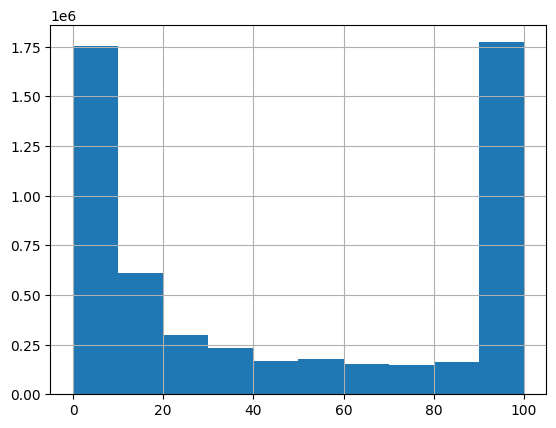

In [25]:
interactions_df.watched_pct.hist()

<Axes: >

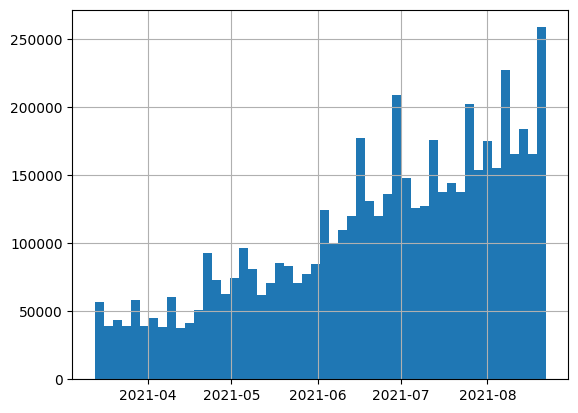

In [26]:
interactions_df['last_watch_dt'].hist(bins=50)

In [27]:
interactions_df.groupby('last_watch_dt').agg('sum')

,user_id,item_id,total_dur,watched_pct
last_watch_dt,,,,
2021-03-13,8860532574,136918221,100239331,838641.0
2021-03-14,8537392016,130610123,103643545,832822.0
2021-03-15,6788842992,102901372,78701288,626049.0
2021-03-16,6968641712,106776443,82689161,636801.0
2021-03-17,6942297660,110651311,81305757,643960.0
...,...,...,...,...
2021-08-18,31375844887,483901778,394018899,2271152.0
2021-08-19,32035160436,496207222,420957423,2306064.0
2021-08-20,33049704790,508069263,405775383,2343252.0


#Looking for insights

In [28]:
users_interactions = interactions_df.merge(users_df, on='user_id', how='inner')
users_interactions.dropna(inplace=True)

In [29]:
sex_interactions = users_interactions.groupby(['last_watch_dt', 'sex']).agg({'user_id': 'count', 'total_dur': 'sum'}).reset_index().sort_values('last_watch_dt')
sex_interactions

,last_watch_dt,sex,user_id,total_dur
0,2021-03-13,Ж,6042,39335564
1,2021-03-13,М,7462,44111423
2,2021-03-14,Ж,5746,36459352
3,2021-03-14,М,7472,47441959
4,2021-03-15,Ж,4501,28400325
...,...,...,...,...
321,2021-08-20,М,23084,124732535
322,2021-08-21,Ж,26293,175992553
323,2021-08-21,М,26458,142937750
324,2021-08-22,Ж,26544,179195460


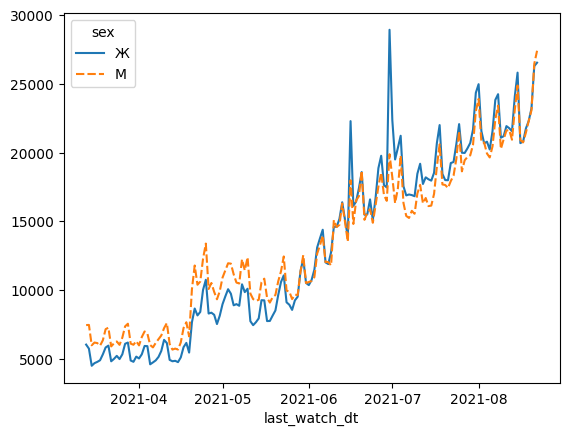

In [30]:
sns.lineplot(data=sex_interactions.pivot(index="last_watch_dt", columns="sex", values="user_id"));

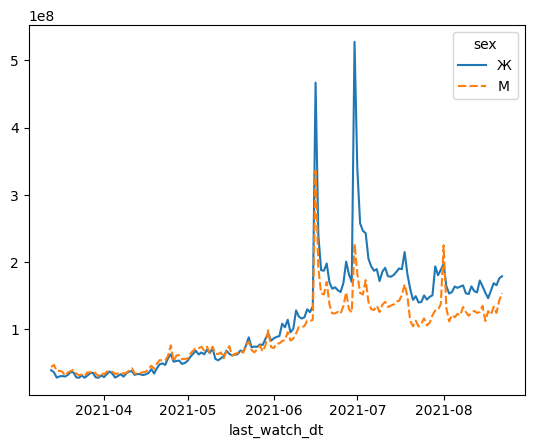

In [31]:
sns.lineplot(data=sex_interactions.pivot(index="last_watch_dt", columns="sex", values="total_dur"));

In [32]:
print(f'{len(set(users_df.user_id.values)^set(interactions_df.user_id.values))} пользователей, которые нет в 1 из таблиц users/unteractions')

313800 пользователей, которые нет в 1 из таблиц users/unteractions


In [33]:
genres = []
for item_genre in items_df.genres.values:
  genres.extend(item_genre.split(', '))
genres = set(genres)

In [34]:
users_movie_interactions = users_interactions.merge(items_df, on='item_id', how='inner')
users_movie_interactions[list(genres)] = 0

def set_genre(x):
  for genre in x['genres'].split(', '):
    x[genre] = 1
  return x

def norm_by_amout(x):
  x[3:] = x[3:]/(users_df[(users_df['age']==x['age']) & (users_df['income']==x['income']) & (users_df['sex']==x['sex'])].count()[0])
  return x

users_movie_interactions = users_movie_interactions.apply(set_genre, axis = 1)
user_genre = users_movie_interactions.groupby(['age', 'income', 'sex']).agg({i:'sum' for i in genres}).reset_index() # Какие жанры смотрят люди из разных категорий
user_genre = user_genre.apply(norm_by_amout, axis=1) # нормируем на количество пользователей в каждой категории

<ipython-input-34-e5003749a5e7>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  users_movie_interactions[list(genres)] = 0
<ipython-input-34-e5003749a5e7>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  users_movie_interactions[list(genres)] = 0
<ipython-input-34-e5003749a5e7>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use 

In [38]:
user_genre = user_genre.apply(norm_by_amout, axis=1)

In [54]:
for i, item in user_genre.iterrows():
  print(f'5 самых пополярных жанра для {item[2]} {item[0]} {item[1]}: {item[3:].sort_values(ascending=False)[:5].index.to_list()}')

5 самых пополярных жанра для Ж age_18_24 income_0_20: ['драмы', 'комедии', 'триллеры', 'приключения', 'боевики']
5 самых пополярных жанра для М age_18_24 income_0_20: ['драмы', 'комедии', 'боевики', 'триллеры', 'приключения']
5 самых пополярных жанра для Ж age_18_24 income_150_inf: ['драмы', 'комедии', 'документальное', 'мелодрамы', 'приключения']
5 самых пополярных жанра для М age_18_24 income_150_inf: ['драмы', 'приключения', 'семейное', 'мелодрамы', 'документальное']
5 самых пополярных жанра для Ж age_18_24 income_20_40: ['драмы', 'комедии', 'триллеры', 'приключения', 'боевики']
5 самых пополярных жанра для М age_18_24 income_20_40: ['драмы', 'комедии', 'боевики', 'триллеры', 'приключения']
5 самых пополярных жанра для Ж age_18_24 income_40_60: ['драмы', 'комедии', 'триллеры', 'приключения', 'боевики']
5 самых пополярных жанра для М age_18_24 income_40_60: ['драмы', 'комедии', 'боевики', 'триллеры', 'приключения']
5 самых пополярных жанра для Ж age_18_24 income_60_90: ['драмы', 'ком